In [1]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable, grad
import model_gp as model
from crypko_data import crypkoFace as cy
from tqdm import tqdm
import torchvision
import matplotlib.pyplot as plt

d:\anaconda3\envs\vits\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#model initialization
G=model.generator(200).cuda()
D=model.discriminator().cuda()
#load savepoint
G.load_state_dict(torch.load('savepoint\iters_19999_G.pth'))
D.load_state_dict(torch.load('savepoint\iters_19999_D.pth'))

<All keys matched successfully>

In [5]:
G.eval()
D.eval()

discriminator(
  (l1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (l2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (l3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (l4): Sequential(
    (0): Conv2d(512, 1024, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=Tru

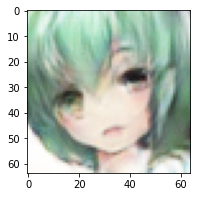

In [548]:
noise=Variable(torch.randn(1, 200)).cuda()
fake_sample = (G(noise).data + 1) / 2.0     #normalization
grid_img = torchvision.utils.make_grid(fake_sample.cpu(), nrow=1)
plt.figure(figsize=(3,3))
plt.imshow(grid_img.permute(1, 2, 0))
plt.show()

In [419]:
torchvision.utils.save_image(fake_sample, f'progress_check\pics\{n}.jpg', nrow=10)
n+=1

In [533]:
save6=noise

In [422]:
save1
save2
save3
save4
save5

tensor([[-0.4284, -0.4448, -0.2854,  0.6612, -0.0662, -1.7624, -0.9025, -0.9113,
         -1.0700, -2.0707,  1.2300,  0.5702,  0.8773, -0.8809,  0.8268,  1.2340,
          2.2643,  0.1844, -0.3901,  1.6779,  1.5108,  1.3275,  0.6243, -0.1041,
         -0.4378, -2.1634,  0.8142, -0.8247, -0.9995,  3.1553, -0.3101, -0.1382,
          0.0303,  1.4535,  1.4268,  0.3417,  0.6944,  0.0066,  1.9239,  0.6270,
          1.4750,  0.1130,  0.1369, -1.8770,  0.7276,  0.3527,  0.1407, -0.4719,
         -0.8325, -0.1394, -0.5536, -1.9535, -0.9508,  1.5965,  0.2214,  1.0866,
         -1.2031, -0.3371, -0.5675,  0.4628,  0.7541,  0.2408, -1.2465, -0.1177,
          0.0490, -0.5660, -0.3671, -1.3236, -1.0350,  0.4152, -0.7723,  1.6072,
         -0.3306,  1.3660,  1.5218,  1.1385,  0.7107, -1.0767, -0.9175, -1.0670,
         -0.4849, -1.1672,  0.0140, -1.6971, -0.0334,  0.7017,  1.0001, -1.9929,
          0.1351, -1.2996,  1.6545,  0.2389, -0.5712, -0.1158, -1.9444, -0.0546,
          1.7353, -0.1475, -

torch.Size([10, 3, 64, 64])


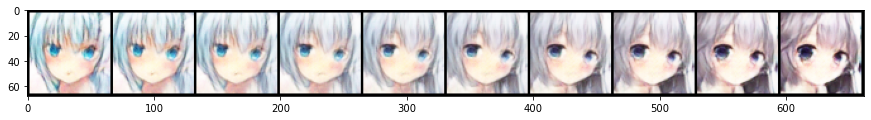

In [534]:
from turtle import shape


scalar=Variable(torch.linspace(0, 1, 10)).cuda()
interpolation=[save5*i+save6*(1-i) for i in scalar]
inter=[]
for i in interpolation:
    fake_sample = (G(i).data + 1) / 2.0     #normalization
    inter.append(fake_sample)
inter = torch.vstack(inter)
print(inter.shape)
plt.figure(figsize=(15,15))

grid_img = torchvision.utils.make_grid(inter.cpu(), nrow=10)
plt.imshow(grid_img.permute(1, 2, 0))